<a href="https://colab.research.google.com/github/nadnik13/sparse_grid/blob/main/recurs_d_basis_124d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import sys

### Вариант с рекурсией на базисе 1ой, 2ой, 4ой степеней

In [2]:
d = 3  # function dimension

In [38]:
def fun(x):
    return math.sin(5 * x[0]) + math.cos(6 * x[1]) + 0.01 * math.sin(10 * x[0] * x[1])

def xli(l, i):
    return i * (2 ** (-l))

def eval(x, grid, bdim, fdim):
    r = 0
    for e in grid:
        temp = e['a']
        for j in range(fdim):
            temp *= phi_li(e['l'][j], e['i'][j], x[j], bdim)
        r += temp
    return r

In [28]:
def add_a(e, bdim, fdim):
    if bdim == 1:
        e['a'] =  alik_1d(e['l'], e['i'], 0, fdim)
    if bdim == 2:
        e['a'] =  alik_2d(e['l'], e['i'], 0, fdim)
    if bdim == 4:
        e['a'] =  alik_4d(e['l'], e['i'], 0, fdim)
    return e

def alik_1d(l, i, k, fdim):
    if k == d:
        x = [xli(l[j], i[j]) for j in range(fdim)]
        return fun(x)
    else:
        main_val = alik_1d(l,i,k+1, fdim)

        if (i[k] > 0 ) and l[k] > 0:  
            i_prev_1 = [val-1 if idx == k else val for idx, val in enumerate(i)]
            i_next_1 = [val+1 if idx == k else val for idx, val in enumerate(i)]
            return main_val - 0.5*(alik_1d(l,i_prev_1,k+1, fdim) + alik_1d(l,i_next_1,k+1, fdim))
        else:
            return main_val
        
def alik_2d(l, i, k, d):
    if k == d:
        x = [xli(l[j], i[j]) for j in range(d)]
        return fun(x)
    else:
        main_val = alik_2d(l,i,k+1)

        if l[k] == 1 and i[k] > 0:
            i_prev_1 =  [val-1 if idx == k else val for idx, val in enumerate(i)]
            i_next_1 =  [val+1 if idx == k else val for idx, val in enumerate(i)]
            return main_val - 0.5 * (alik_2d(l,i_prev_1,k+1, d) + alik_2d(l,i_next_1,k+1, d))
        
        if l[k] > 1:
            i_prev_1 = [val-1 if idx == k else val for idx, val in enumerate(i)]
            i_next_1 = [val+1 if idx == k else val for idx, val in enumerate(i)]

            prev_1_val = alik_2d(l,i_prev_1,k+1, d)
            next_1_val = alik_2d(l,i_next_1,k+1, d)
            
            if (i[k] % 4 == 1):
                i_next_3 = [val+3 if idx == k else val for idx, val in enumerate(i)]
                next_3_val = alik_2d(l,i_next_3,k+1, d)
                return main_val - 0.125*(3*prev_1_val+6*next_1_val-next_3_val)
            
            if (i[k] % 4 == 3):
                i_prev_3 = [val-3 if idx == k else val for idx, val in enumerate(i)]
                prev_3_val = alik_2d(l,i_prev_3,k+1, d)
                return main_val - 0.125*(6*prev_1_val+3*next_1_val-prev_3_val)
        return main_val

def alik_4d(l, i, k, d):

    if k == d:
        x = [xli(l[j], i[j]) for j in range(d)]
        return fun(x)
    else:
        main_val = alik_4d(l,i,k+1)
        i_prev_1 = [val-1 if idx == k else val for idx, val in enumerate(i)]
        i_next_1 = [val+1 if idx == k else val for idx, val in enumerate(i)]
        
        i_prev_3 = [val-3 if idx == k else val for idx, val in enumerate(i)]
        i_next_3 = [val+3 if idx == k else val for idx, val in enumerate(i)]
        
        i_prev_5 = [val-5 if idx == k else val for idx, val in enumerate(i)]
        i_next_5 = [val+5 if idx == k else val for idx, val in enumerate(i)]
        
        i_prev_7 = [val-7 if idx == k else val for idx, val in enumerate(i)]
        i_next_7 = [val+7 if idx == k else val for idx, val in enumerate(i)]

        if l[k] == 1 and i[k] > 0 :
            return main_val - 0.5 * ( alik_4d(l,i_prev_1,k+1, d) + alik_4d(l,i_next_1,k+1, d) )
        
        if l[k] == 2:
            prev_1_val = alik_4d(l,i_prev_1,k+1, d)
            next_1_val = alik_4d(l,i_next_1,k+1, d)
            
            if (i[k] % 4 == 1):
                next_3_val = alik_4d(l,i_next_3,k+1, d)
                return main_val - 0.125 * (3*prev_1_val + 6*next_1_val - next_3_val)
            
            if (i[k] % 4 == 3):
                prev_3_val = alik_4d(l,i_prev_3,k+1, d)
                return main_val - 0.125 * (6*prev_1_val + 3*next_1_val - prev_3_val)
        
        if l[k] > 2: 
            
            prev_1_val = alik_4d(l,i_prev_1,k+1, d)
            next_1_val = alik_4d(l,i_next_1,k+1, d)
            prev_3_val = alik_4d(l,i_prev_3,k+1, d)
            next_3_val = alik_4d(l,i_next_3,k+1, d)
            
            if (i[k] % 8 == 1):
                next_5_val = alik_4d(l,i_next_5,k+1, d)
                next_7_val = alik_4d(l,i_next_7,k+1, d)
                return main_val - 1/128 * (35*prev_1_val + 140*next_1_val - 70*next_3_val + 28*next_5_val - 5*next_7_val)
            
            elif (i[k] % 8 == 3):
                next_5_val = alik_4d(l,i_next_5,k+1, d)
                return main_val - 1/128 * (-5*prev_3_val + 60*prev_1_val + 90*next_1_val - 20*next_3_val + 3*next_5_val)
            
            elif (i[k] % 8 == 5):
                prev_5_val = alik_4d(l,i_prev_5,k+1, d)
                return main_val - 1/128 * (3*prev_5_val - 20*prev_3_val + 90*prev_1_val + 60*next_1_val - 5*next_3_val)
            
            elif (i[k] % 8 == 7):
                prev_5_val = alik_4d(l,i_prev_5,k+1, d)
                prev_7_val = alik_4d(l,i_prev_7,k+1, d)
                return main_val - 1/128 * (-5*prev_7_val + 28*prev_5_val - 70*prev_3_val + 140*prev_1_val + 35*next_1_val)
            
        return main_val

### Выбор базисной функции

In [58]:
def phi_li(l, i, x, db):
        if db == 1:
            return phi_li_1(l, i, x, db)
        if db == 2:
            return phi_li_2(l, i, x, db)
        if db == 4:
            return phi_li_4(l, i, x, db)
        
def phi_li_1(l, i, x, db):
    if db == 1:
        return phi_1(x * 2 ** l - i)

def phi_li_2(l, i, x, db):
        if l == 0:
            return phi_1(x * 2 ** l - i)
        else:
            return phi_2(x * 2 ** l - i)
        
def phi_li_4(l, i, x, db):
    if l == 0:
        return phi_1(x * 2 ** l - i)
    elif l == 1:
        return phi_2(x * 2 ** l - i)
    elif i % 4 == 1:
        return phi_4_1(x * 2 ** l - i)
    elif i % 4 == 3:
        return phi_4_2(x * 2 ** l - i)
    return 0

def phi_1(x):
    if -1 <= x <= 1:
        return 1 - abs(x)
    return 0

def phi_2(x):
    if -1 <= x <= 1:
        return - (x-1)*(x+1)
    return 0

def phi_4_1(x):
    if -1 <= x <= 3:
        return - 1/6 * (x+1)*(x-1)*(x-2)*(x-3)
    return 0

def phi_4_2(x):
    if -3 <= x <= 1:
        return - 1/6 * (x+3)*(x+2)*(x+1)*(x-1)
    return 0

### Инициализация данных

In [30]:
xt = {'full': [], 'sparse': []}
yt = {'full': [], 'sparse': []}
zt = {'full': [], 'sparse': []}
ft_d = []
ft = {'full': {'xy': [], 'yz': [], 'xz': []}, 'sparse': {'xy': [], 'yz': [], 'xz': [] }}
errors_d = []
n_points_d = []



In [31]:
grid_levels = [1,2,3,5,7]
basis_dimensions = [1,2,4] # basis dimension
gridTypes = ['full', 'sparse']
func_dimension = 3  # function dimension

### Generate grid

In [52]:
def buildGrid(grid_level, type, bdim,  fdim):
    print('grid_level:', grid_level)
    grid=[]
    x = [0,0]
    for ii in range(1 << fdim):
        l = [(ii >> j) & 1 for j in range(fdim)]
        z = [j for j in range(fdim) if l[j] == 0]
        i = [1] * fdim
        for jj in range(1 << len(z)):
            i = i[:]
            for j in range(len(z)):
                 i[z[j]] = (jj >> j) & 1
            grid.append(add_a({'l': l, 'i': i.copy()}, bdim, fdim))
            
        for e in grid:
            l = e['l']
            if sum(l) == grid_level + fdim - 1 or abs(e['a']) < 1e-3 and type == 'sparse':
                continue
            for j in range(fdim):
                if l[j] == 0:
                    continue
                i = e['i']
                child_1 = add_a({'l': l[:j] + [l[j] + 1] + l[j + 1:], 'i': i[:j] + [2 * i[j] - 1] + i[j + 1:]}, bdim, fdim)
                child_2 = add_a({'l': l[:j] + [l[j] + 1] + l[j + 1:], 'i': i[:j] + [2 * i[j] + 1] + i[j + 1:]}, bdim, fdim)
                if child_1 not in grid:
                    grid.append(child_1)
                if child_2 not in grid:
                    grid.append(child_2)
    return grid.copy()

In [44]:
def calculateError(grid_levels, basis_dimensions, fdim):
  for bdim in basis_dimensions:
      print('basis_dimension:', bdim)
      n_points = {'full': [], 'sparse': []}
      errors = {'full': [], 'sparse': []}
      for grid_level in grid_levels:
  #         print('grid_level:', n)
          for type in gridTypes:
            grid = buildGrid(grid_level, type, bdim,  fdim)
            # print(grid)
              
            error = 0
              
            for i in range(11):
                for j in range(11):
                    for k in range(11):
                        x = i * 0.1
                        y = j * 0.1
                        z = k * 0.1
                        error = max(error, abs(eval([x, y, z], grid, bdim, fdim) - fun([x, y, z])))

  #             print(len(grid))
  #             print(error)

            xt[type].append( [xli(e['l'][0], e['i'][0]) for e in grid])
            yt[type].append( [xli(e['l'][1], e['i'][1]) for e in grid])
            zt[type].append( [xli(e['l'][2], e['i'][2]) for e in grid])

            n_points[type].append(len(grid))
            errors[type].append(error)

            ft[type]['xy'].append( [fun([xli(e['l'][0], e['i'][0]), xli(e['l'][1], e['i'][1]), 0.3]) for e in grid])
            ft[type]['yz'].append( [fun([0.3, xli(e['l'][1], e['i'][1]), xli(e['l'][2], e['i'][2])]) for e in grid])
            ft[type]['xz'].append( [fun([xli(e['l'][0], e['i'][0]),0.7, xli(e['l'][2], e['i'][2])]) for e in grid])
      n_points_d.append(n_points)
      errors_d.append(errors)
      ft_d.append(ft)

In [25]:
def calculateError(grid, grid_levels, basis_dimensions, fdim):
  for bdim in basis_dimensions:
      print('basis_dimension:', bdim)
      n_points = {'full': [], 'sparse': []}
      errors = {'full': [], 'sparse': []}
      for n in grid_levels:
  #         print('grid_level:', n)
          for s in ['full', 'sparse']:
              grid=[]
              x = [0,0]
              for ii in range(1 << d):
                  l = [(ii >> j) & 1 for j in range(d)]
                  z = [j for j in range(d) if l[j] == 0]
                  i = [1] * d
                  for jj in range(1 << len(z)):
                      i = i[:]
                      for j in range(len(z)):
                          i[z[j]] = (jj >> j) & 1
                      grid.append(add_a({'l': l, 'i': i.copy()}, db))

              for e in grid:
                  l = e['l']
                  if sum(l) == n + d - 1 or abs(e['a']) < 1e-3 and s == 'sparse':
                      continue
                  for j in range(d):
                      if l[j] == 0:
                          continue
                      i = e['i']
                      child_1 = add_a({'l': l[:j] + [l[j] + 1] + l[j + 1:], 'i': i[:j] + [2 * i[j] - 1] + i[j + 1:]}, db)
                      child_2 = add_a({'l': l[:j] + [l[j] + 1] + l[j + 1:], 'i': i[:j] + [2 * i[j] + 1] + i[j + 1:]}, db)
                      if child_1 not in grid:
                          grid.append(child_1)
                      if child_2 not in grid:
                          grid.append(child_2)
              
              error = 0
              
              for i in range(11):
                  for j in range(11):
                      for k in range(11):
                          x = i * 0.1
                          y = j * 0.1
                          z = k * 0.1
                          error = max(error, abs(eval([x, y, z], bdim) - fun([x, y, z])))

  #             print(len(grid))
  #             print(error)

              xt[s].append( [xli(e['l'][0], e['i'][0]) for e in grid])
              yt[s].append( [xli(e['l'][1], e['i'][1]) for e in grid])
              zt[s].append( [xli(e['l'][2], e['i'][2]) for e in grid])

              n_points[s].append(len(grid))
              errors[s].append(error)

              ft[s]['xy'].append( [fun([xli(e['l'][0], e['i'][0]), xli(e['l'][1], e['i'][1]), 0.3]) for e in grid])
              ft[s]['yz'].append( [fun([0.3, xli(e['l'][1], e['i'][1]), xli(e['l'][2], e['i'][2])]) for e in grid])
              ft[s]['xz'].append( [fun([xli(e['l'][0], e['i'][0]),0.7, xli(e['l'][2], e['i'][2])]) for e in grid])
      n_points_d.append(n_points)
      errors_d.append(errors)
      ft_d.append(ft)

In [ ]:
calculateError(grid_levels, basis_dimensions, func_dimension)

basis_dimension: 1
grid_level: 1
[{'l': [0, 0, 0], 'i': [0, 0, 0], 'a': 1.0}, {'l': [0, 0, 0], 'i': [1, 0, 0], 'a': 0.041075725336861546}, {'l': [0, 0, 0], 'i': [0, 1, 0], 'a': 0.960170286650366}, {'l': [0, 0, 0], 'i': [1, 1, 0], 'a': -0.004194199121666185}, {'l': [0, 0, 0], 'i': [0, 0, 1], 'a': 1.0}, {'l': [0, 0, 0], 'i': [1, 0, 1], 'a': 0.041075725336861546}, {'l': [0, 0, 0], 'i': [0, 1, 1], 'a': 0.960170286650366}, {'l': [0, 0, 0], 'i': [1, 1, 1], 'a': -0.004194199121666185}, {'l': [1, 0, 0], 'i': [1, 0, 0], 'a': 1.0779342814355257}, {'l': [1, 0, 0], 'i': [1, 1, 0], 'a': 1.0710651442433412}, {'l': [1, 0, 0], 'i': [1, 0, 1], 'a': 1.0779342814355257}, {'l': [1, 0, 0], 'i': [1, 1, 1], 'a': 1.0710651442433412}, {'l': [2, 0, 0], 'i': [1, 0, 0], 'a': 0.649748547303608}, {'l': [2, 0, 0], 'i': [3, 0, 0], 'a': -0.39133525346275266}, {'l': [2, 0, 0], 'i': [1, 1, 0], 'a': 0.660527890117963}, {'l': [2, 0, 0], 'i': [3, 1, 0], 'a': -0.37444052676724293}, {'l': [2, 0, 0], 'i': [1, 0, 1], 'a': 0.64

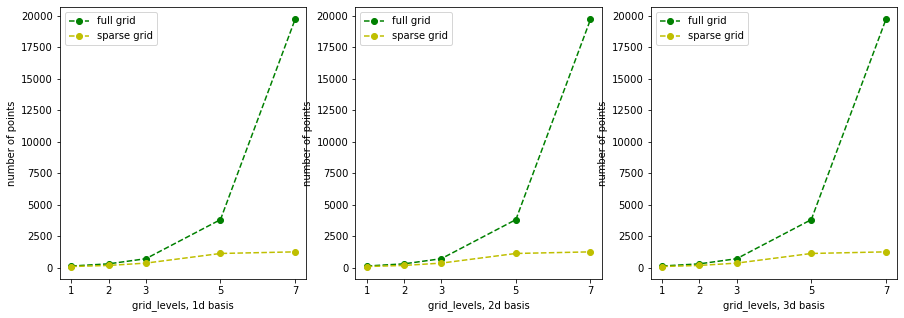

In [ ]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,3,1)

ax.plot(grid_levels,n_points_d[0]['full'], 'go--', label='full grid')
ax.plot(grid_levels,n_points_d[0]['sparse'], 'yo--', label='sparse grid')
ax.set(xlabel='grid_levels, 1d basis', ylabel='number of points')
ax.set_xticks(grid_levels)
ax.legend(loc='best')

ax = fig.add_subplot(1,3,2)

ax.plot(grid_levels,n_points_d[0]['full'], 'go--', label='full grid')
ax.plot(grid_levels,n_points_d[0]['sparse'], 'yo--', label='sparse grid')
ax.set(xlabel='grid_levels, 2d basis', ylabel='number of points')
ax.set_xticks(grid_levels)
ax.legend(loc='best')

ax = fig.add_subplot(1,3,3)

ax.plot(grid_levels,n_points_d[0]['full'], 'go--', label='full grid')
ax.plot(grid_levels,n_points_d[0]['sparse'], 'yo--', label='sparse grid')
ax.set(xlabel='grid_levels, 3d basis', ylabel='number of points')
ax.set_xticks(grid_levels)
ax.legend(loc='best')

### Зависимость погрешности интерполяции от количества уровней сеткок

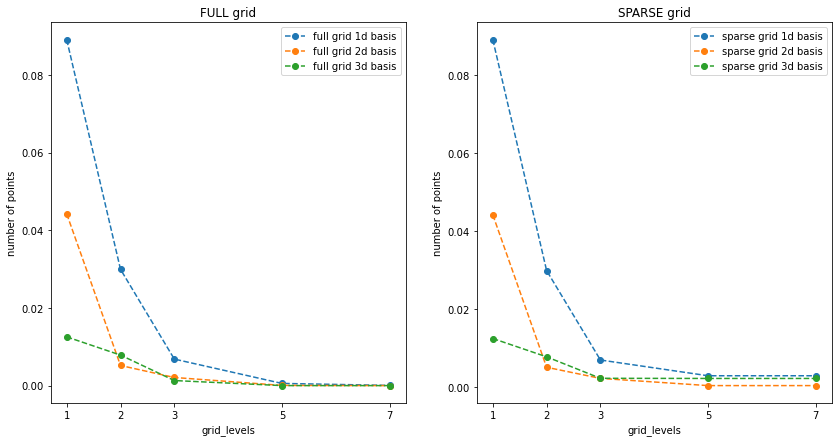

In [ ]:
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(1,2,1)
for db in range(len(basis_dimensions)):
    ax.title.set_text('FULL grid')
    ax.plot(grid_levels,errors_d[db]['full'],'o--', label=f'full grid {db+1}d basis')
    ax.set(xlabel='grid_levels', ylabel='number of points')
    ax.set_xticks(grid_levels)
    ax.legend(loc='best')
    
ax = fig.add_subplot(1,2,2)
for db in range(len(basis_dimensions)):
    ax.title.set_text('SPARSE grid')
    ax.plot(grid_levels,errors_d[db]['sparse'], 'o--', label=f'sparse grid {db+1}d basis')
    ax.set(xlabel='grid_levels', ylabel='number of points')
    ax.set_xticks(grid_levels)
    ax.legend(loc='best')

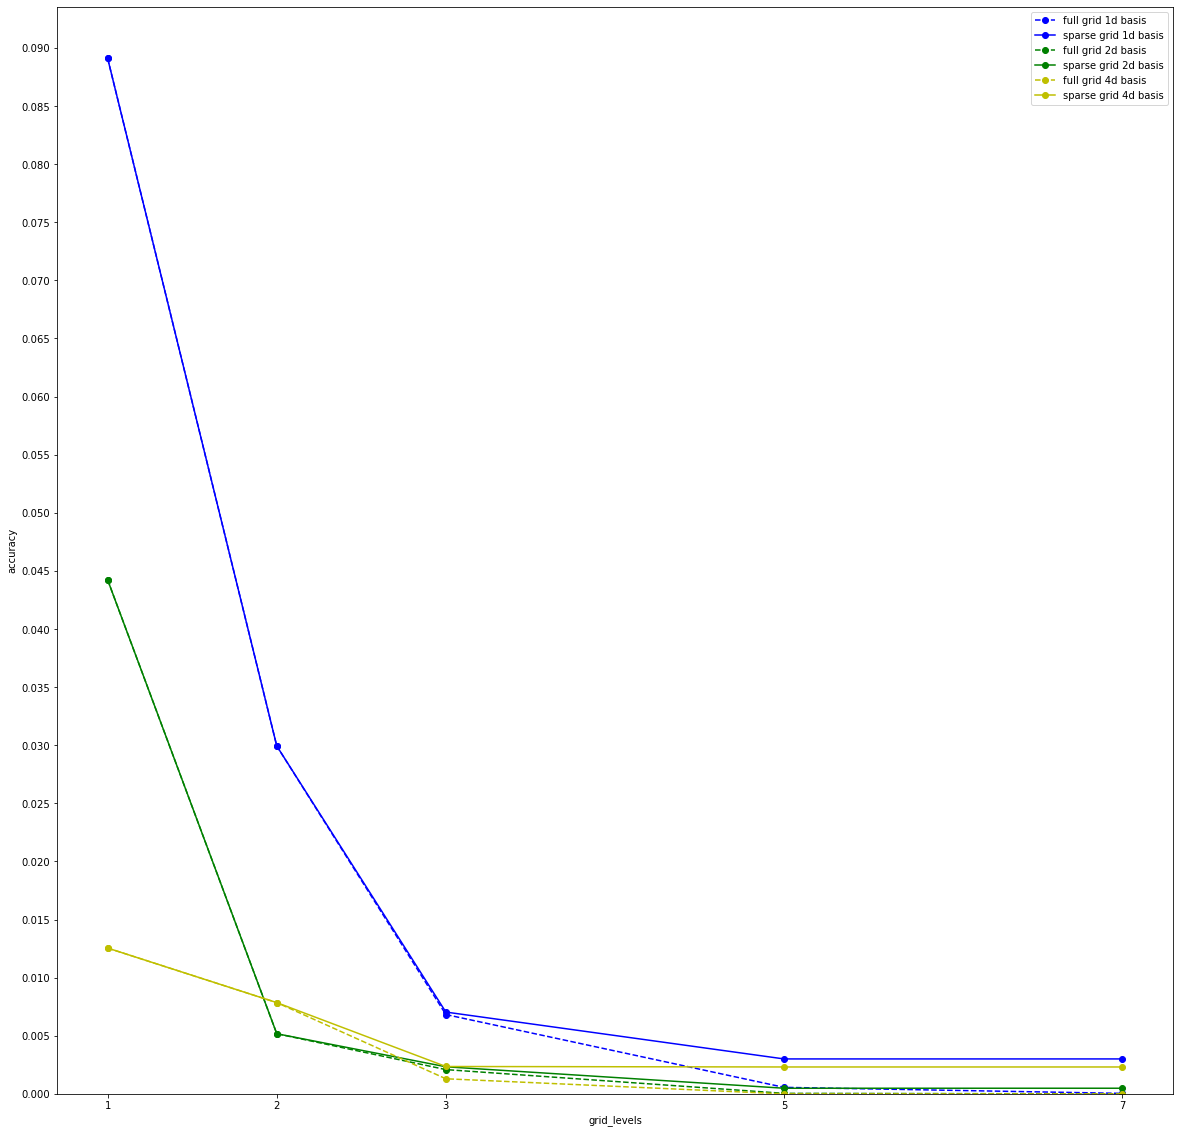

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)

ax.plot(grid_levels,errors_d[0]['full'],'bo--', label=f'full grid 1d basis')
ax.plot(grid_levels,errors_d[0]['sparse'], 'bo-', label=f'sparse grid 1d basis')

ax.plot(grid_levels,errors_d[1]['full'],'go--', label=f'full grid 2d basis')
ax.plot(grid_levels,errors_d[1]['sparse'], 'go-', label=f'sparse grid 2d basis')

ax.plot(grid_levels,errors_d[2]['full'],'yo--', label=f'full grid 4d basis')
ax.plot(grid_levels,errors_d[2]['sparse'], 'yo-', label=f'sparse grid 4d basis')

ax.set(xlabel='grid_levels', ylabel='accuracy')
ax.set_xticks(grid_levels)
ax.set_yticks(np.arange(0, max(errors_d[0]['full'])+0.005, 0.005))
ax.set_ylim([0, 1.05*max(errors_d[0]['full'])])

ax.legend(loc='best')

In [ ]:
n_points_d


[{'full': [123, 297, 705, 3809, 19713], 'sparse': [83, 171, 355, 1121, 1249]},
 {'full': [123, 297, 705, 3809, 19713], 'sparse': [83, 171, 355, 635, 635]},
 {'full': [123, 297, 705, 3809, 19713], 'sparse': [83, 167, 299, 363, 363]}]